## Exploratory Data Analysis

In this section, we will explore the cleaned ZIP-level real estate data to uncover patterns and insights relevant to first-time home buyers. Our EDA goals are to:

1. **Understand distributions**  
   - Visualize the spread and central tendency of key metrics (sale price, list price, price per square foot, days on market, inventory, sale-to-list ratio).  
2. **Examine relationships**  
   - Use scatterplots and correlation matrices to identify how affordability, turnover, and supply interact across ZIPs.  
3. **Analyze temporal trends**  
   - Plot time-series of median prices and inventory by ZIP and region to assess seasonality, growth rates, and market momentum.  
4. **Compare geographies**  
   - Map metric heatmaps to highlight areas with the most favorable conditions for first-time buyers.
5. **Check Price growth**
   - Check The Median price growth by zipcode over 5 years and 10 years horizon for Single Family Homes.
6. **Identify clusters or segments**  
   - Group ZIPs based on affordability and market dynamics to find distinct market profiles.

These analyses will inform feature selection and guide the development of models or ranking indices to recommend the best ZIP codes for first-time buyers. Let’s begin with univariate summaries.  


In [1]:
''' Import Libraries '''

import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
''' Load the dataset '''

# 1. Load the cleaned dataset
file_path = 'data/cleaned_data/cleaned_dataset.csv'
df = pd.read_csv(file_path, parse_dates=['PERIOD_BEGIN', 'PERIOD_END'])
pd.set_option('display.max_columns', None)

# 3. Quick sanity-check
print("Data shape:", df.shape)
print(df.dtypes)
df.head()

Data shape: (1069710, 53)
PERIOD_BEGIN                      datetime64[ns]
PERIOD_END                        datetime64[ns]
PERIOD_DURATION                            int64
REGION_TYPE                               object
REGION_TYPE_ID                             int64
STATE                                     object
STATE_CODE                                object
PROPERTY_TYPE                             object
PROPERTY_TYPE_ID                           int64
MEDIAN_SALE_PRICE                        float64
MEDIAN_SALE_PRICE_MOM                    float64
MEDIAN_SALE_PRICE_YOY                    float64
MEDIAN_LIST_PRICE                        float64
MEDIAN_LIST_PRICE_MOM                    float64
MEDIAN_PPSF                              float64
MEDIAN_PPSF_MOM                          float64
MEDIAN_PPSF_YOY                          float64
MEDIAN_LIST_PPSF                         float64
MEDIAN_LIST_PPSF_MOM                     float64
HOMES_SOLD                               fl

PERIOD_BEGIN PERIOD_END  PERIOD_DURATION REGION_TYPE  REGION_TYPE_ID  \
0   2019-05-01 2019-07-31               90    zip code               2   
1   2023-01-01 2023-03-31               90    zip code               2   
2   2015-09-01 2015-11-30               90    zip code               2   
3   2020-01-01 2020-03-31               90    zip code               2   
4   2016-12-01 2017-02-28               90    zip code               2   

            STATE STATE_CODE              PROPERTY_TYPE  PROPERTY_TYPE_ID  \
0      California         CA    Multi-Family (2-4 Unit)                 4   
1        Illinois         IL  Single Family Residential                 6   
2         Florida         FL    Multi-Family (2-4 Unit)                 4   
3   West Virginia         WV                  Townhouse                13   
4  South Carolina         SC            All Residential                -1   

   MEDIAN_SALE_PRICE  MEDIAN_SALE_PRICE_MOM  MEDIAN_SALE_PRICE_YOY  \
0           655500.0               0.077239               0.197260   
1           169000.0               0.011976               0.229091   
2            59000.0              -0.432692              -0.796552   
3           185000.0              -0.028871               0.097923   
4           148857.5               0.004335               0.103466   

   MEDIAN_LIST_PRICE  MEDIAN_LIST_PRICE_MOM  MEDIAN_PPSF  MEDIAN_PPSF_MOM  \
0           600000.0              -0.157895   310.091743        -0.176327   
1           179900.0               0.000000    90.167454        -0.011498   
2           169500.0              -0.053073    76.129032        -0.070621   
3           208112.5              -0.051663   110.451949        -0.164439   
4           145900.0               0.009727    98.707710        -0.009027   

   MEDIAN_PPSF_YOY  MEDIAN_LIST_PPSF  MEDIAN_LIST_PPSF_MOM  HOMES_SOLD  \
0         0.673646        302.752294              0.052174         3.0   
1         0.025614        104.651163              0.054884        25.0   
2        -0.029749        176.748885             -0.084018         1.0   
3         0.117144        113.525048              0.000000         8.0   
4         0.198594         95.229839             -0.001100        44.0   

   HOMES_SOLD_MOM  HOMES_SOLD_YOY  PENDING_SALES  PENDING_SALES_MOM  \
0        0.500000        2.000000            2.0           0.000000   
1       -0.074074       -0.137931           29.0           0.318182   
2       -0.500000        0.000000            3.0           0.000000   
3        0.000000        3.000000            8.0           0.000000   
4        0.333333        0.333333           44.0           0.333333   

   NEW_LISTINGS  NEW_LISTINGS_MOM  INVENTORY  INVENTORY_MOM  MEDIAN_DOM  \
0           3.0          0.500000        2.0       1.000000        27.0   
1          25.0          0.190476       12.0       0.090909        32.5   
2          28.0          0.333333        1.0       0.000000        75.0   
3          12.0          0.500000       16.0       0.142857       237.5   
4          57.0          0.140000      108.0      -0.018182       154.5   

   MEDIAN_DOM_MOM  MEDIAN_DOM_YOY  AVG_SALE_TO_LIST  AVG_SALE_TO_LIST_MOM  \
0           -51.5           -42.0          1.041624              0.025438   
1             7.5           -48.5          0.967367             -0.011181   
2            31.5          -252.0          0.907692             -0.043152   
3            80.5           185.5          0.984259              0.002674   
4            -6.5           -23.5          0.971145              0.000952   

   AVG_SALE_TO_LIST_YOY  SOLD_ABOVE_LIST  SOLD_ABOVE_LIST_MOM  \
0              0.044356         1.000000             0.000000   
1             -0.021441         0.120000            -0.102222   
2             -0.058974         0.000000             0.000000   
3              0.038150         0.000000             0.000000   
4              0.026631         0.159091             0.037879   

   SOLD_ABOVE_LIST_YOY  OFF_MARKE

In [3]:
'''
Parse ZIP before starting
'''
# 1. Convert ZIP to five-digit strings
df['ZIP'] = df['ZIP'].astype(str).str.zfill(5)

# 2. Quick sanity check
print("ZIP dtype:", df['ZIP'].dtype)
print("Sample ZIPs:", df['ZIP'].unique()[:10])
for z in ['10001','60601','94105']:
    print(z, "in data?", z in df['ZIP'].values)

ZIP dtype: object
Sample ZIPs: ['92173' '61523' '32207' '26501' '29569' '17702' '80816' '55448' '56007'
 '17830']
10001 in data? True
60601 in data? True
94105 in data? True


# 1. Understand distributions:
**Visualize the spread and central tendency of key metrics (sale price, list price, price per square foot, days on market, inventory, sale-to-list ratio).**

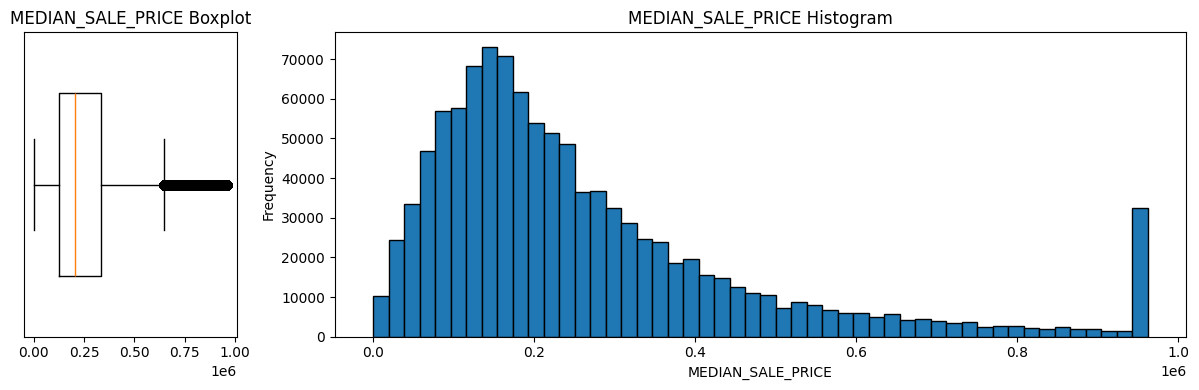

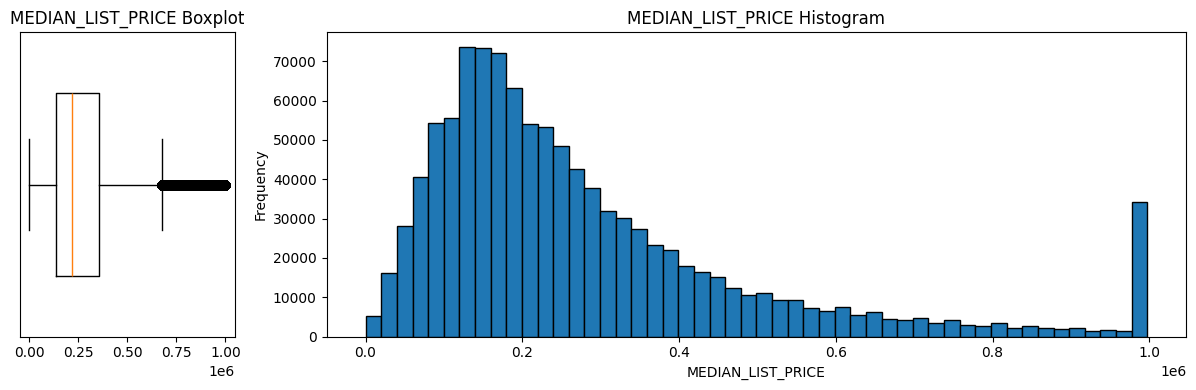

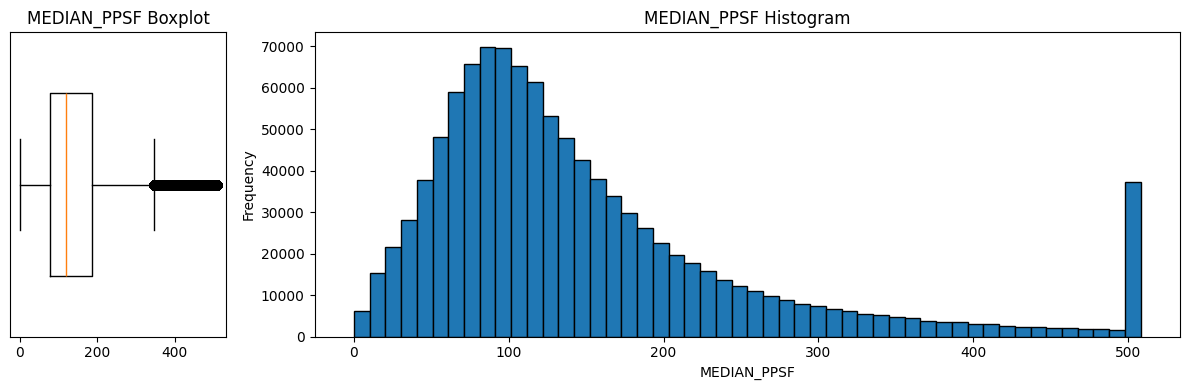

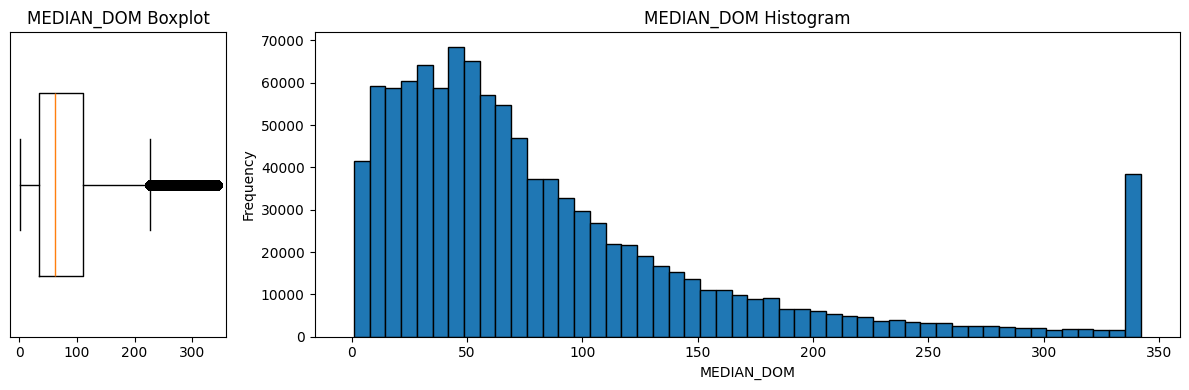

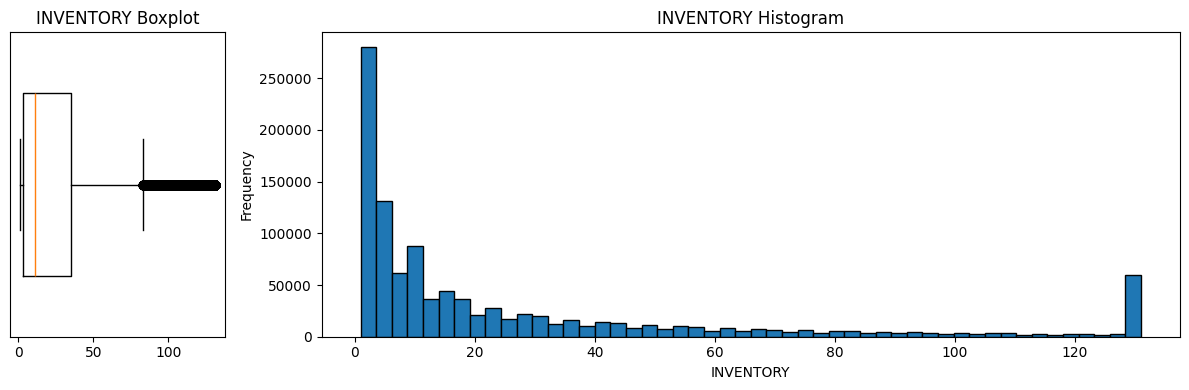

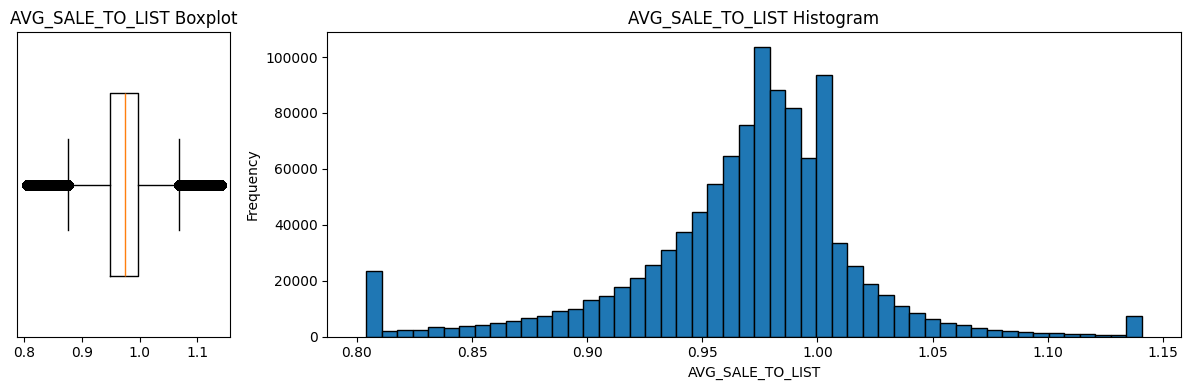

In [4]:

# Combined Boxplot + Histogram for key metrics
metrics = [
    'MEDIAN_SALE_PRICE', 
    'MEDIAN_LIST_PRICE', 
    'MEDIAN_PPSF', 
    'MEDIAN_DOM', 
    'INVENTORY', 
    'AVG_SALE_TO_LIST'
]

for metric in metrics:
    data = df[metric].dropna()
    
    # Create side-by-side boxplot and histogram
    fig, (ax_box, ax_hist) = plt.subplots(
        ncols=2,
        figsize=(12, 4),
        gridspec_kw={'width_ratios': [1, 4]}
    )
    
    # Boxplot on the left
    ax_box.boxplot(data, vert=False, widths=0.6)
    ax_box.set_title(f'{metric} Boxplot')
    ax_box.set_yticks([])
    
    # Histogram on the right
    ax_hist.hist(data, bins=50, edgecolor='black')
    ax_hist.set_title(f'{metric} Histogram')
    ax_hist.set_xlabel(metric)
    ax_hist.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

## Initial Insights from Univariate Distributions

1. **Median Sale & List Price**  
   - Both metrics exhibit a pronounced right skew: the bulk of ZIP-quarters cluster between \$50 K–\$250 K, with a long tail extending toward the \$1 M winsorized cap.  
   - The spike at the upper bound reflects our winsorization – only a small fraction of markets push or exceed this threshold.  
   - **Implication:** A log-transformation (or similar) will be critical before any distance- or variance-based modeling to stabilize variance and mitigate heavy tails.

2. **Price per Square Foot (PPSF)**  
   - Typical PPSF values concentrate around \$75–\$150, though some markets exhibit extreme per-foot prices (capped at our upper bound).  
   - This normalization by size will be especially useful when comparing affordability across ZIPs with wildly differing home footprints.

3. **Days on Market (DOM)**  
   - Most ZIPs see median DOM in the 30–60 day range, but a non-negligible tail extends beyond 200 days, indicating pockets of very slow-moving inventory.  
   - **Insight for first-timers:** Targeting ZIPs in the lower-quartile of DOM (e.g. < 30 days) may indicate strong buyer demand but also greater competition; the interquartile range (25–75 days) likely balances deal speed and availability.

4. **Inventory Levels**  
   - Supply is highly variable: many ZIPs have fewer than 20 active listings per quarter, while a small subset exhibits inventory counts in excess of 100 (again capped).  
   - Low-inventory markets can drive up competition and price volatility—first-time buyers may prefer ZIPs within the middle inventory quintiles to ensure choice without fierce bidding wars.

5. **Sale-to-List Ratio**  
   - The sale-to-list ratio distribution centers just below 1.00, with most markets transacting at or slightly above list price.  
   - A right-skewed tail above 1.05 confirms that some markets are hot seller’s markets.  
   - **Recommendation:** For more negotiating power, first-time buyers should favor ZIPs where this ratio falls below the overall median (≈0.98–1.00).

---


# 2. Examine relationships:
**Use scatterplots and correlation matrices to identify how affordability, turnover, and supply interact across ZIPs.**

Correlation matrix:
                    MEDIAN_SALE_PRICE  MEDIAN_LIST_PRICE  MEDIAN_PPSF  \
MEDIAN_SALE_PRICE           1.000000           0.895089     0.873884   
MEDIAN_LIST_PRICE           0.895089           1.000000     0.823499   
MEDIAN_PPSF                 0.873884           0.823499     1.000000   
MEDIAN_DOM                 -0.165170          -0.148399    -0.203252   
INVENTORY                   0.040921           0.038551     0.019000   
AVG_SALE_TO_LIST            0.280931           0.231875     0.303741   

                   MEDIAN_DOM  INVENTORY  AVG_SALE_TO_LIST  
MEDIAN_SALE_PRICE   -0.165170   0.040921          0.280931  
MEDIAN_LIST_PRICE   -0.148399   0.038551          0.231875  
MEDIAN_PPSF         -0.203252   0.019000          0.303741  
MEDIAN_DOM           1.000000  -0.087724         -0.347489  
INVENTORY           -0.087724   1.000000          0.037116  
AVG_SALE_TO_LIST    -0.347489   0.037116          1.000000  


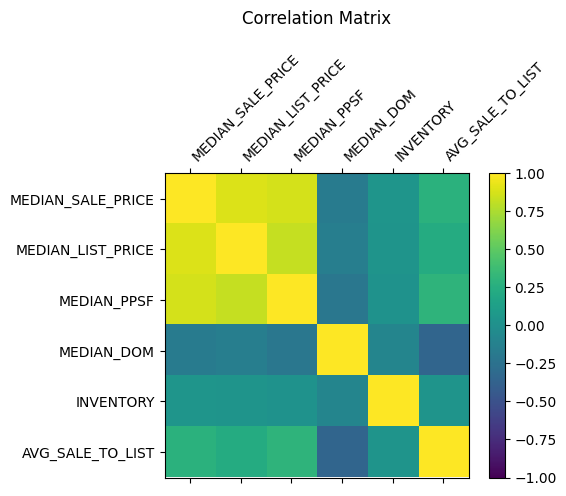

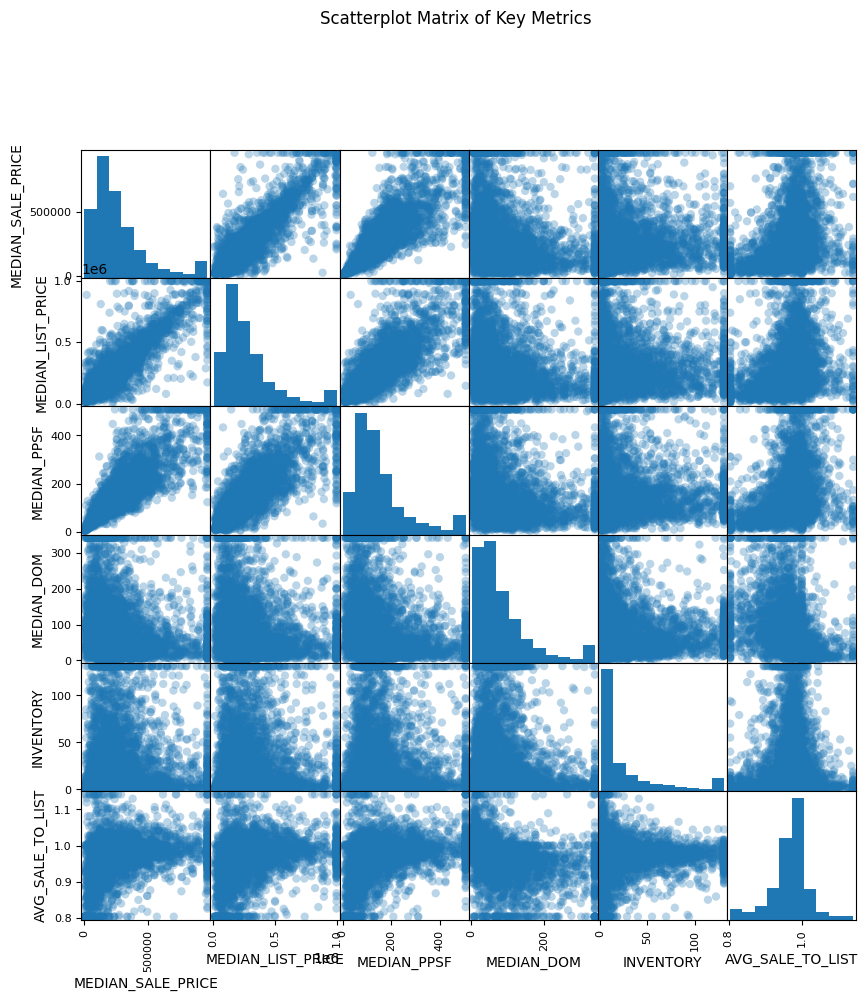

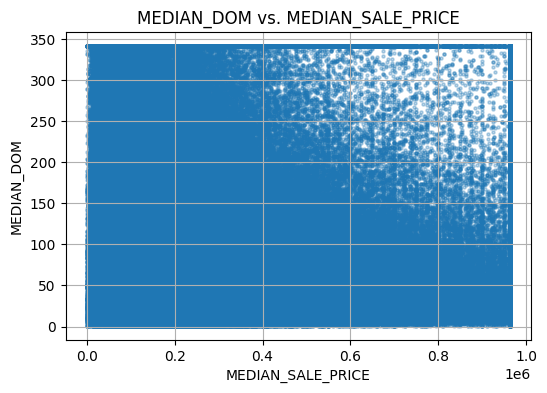

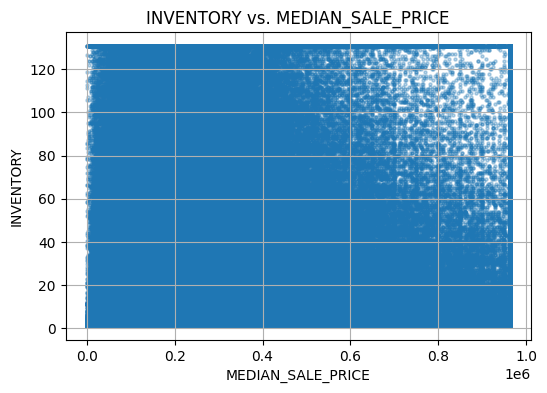

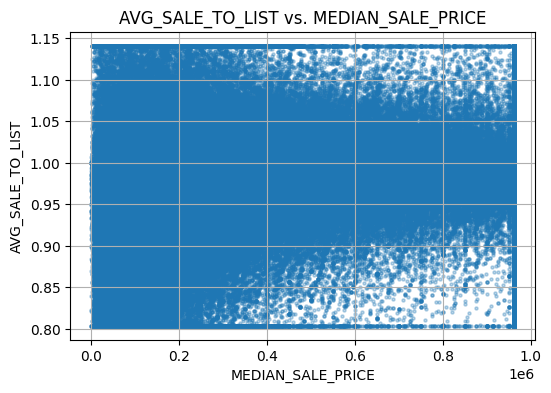

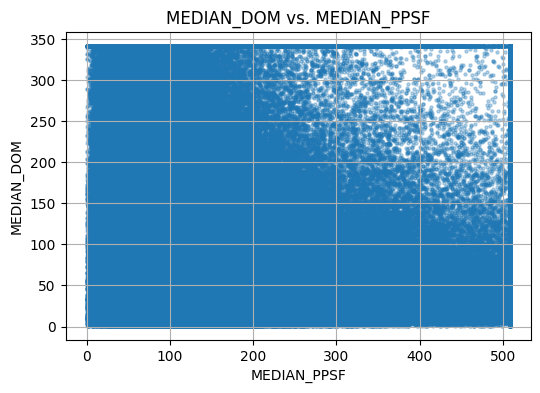

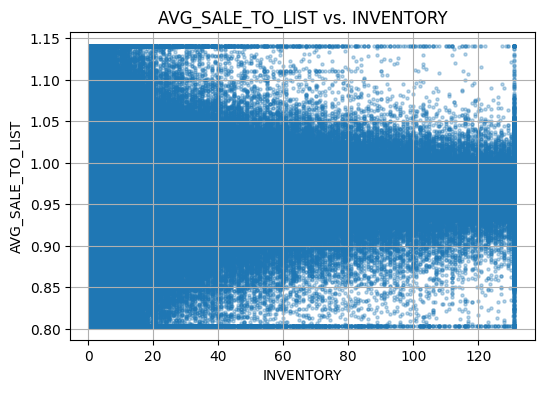

In [5]:

# Select metrics for affordability, turnover, and supply
metrics = [
    'MEDIAN_SALE_PRICE',     # affordability
    'MEDIAN_LIST_PRICE',
    'MEDIAN_PPSF',           # affordability per sqft
    'MEDIAN_DOM',            # turnover
    'INVENTORY',             # supply
    'AVG_SALE_TO_LIST'       # competition intensity
]

# 1. Compute and display the correlation matrix
corr = df[metrics].corr()
print("Correlation matrix:\n", corr)

# 2. Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(range(len(metrics)))
ax.set_yticks(range(len(metrics)))
ax.set_xticklabels(metrics, rotation=45, ha='left')
ax.set_yticklabels(metrics)
ax.set_title("Correlation Matrix", pad=20)
plt.tight_layout()
plt.show()

# 3. Scatterplot matrix to visualize pairwise relationships
#    Use a random sample if the dataset is large
sample = df[metrics].dropna().sample(n=5000, random_state=1)

scatter_matrix(
    sample,
    figsize=(10, 10),
    diagonal='hist',
    alpha=0.3,
    marker='o'
)
plt.suptitle("Scatterplot Matrix of Key Metrics", y=1.02)
plt.show()

# 4. Individual scatterplots for key pairs
pairs = [
    ('MEDIAN_SALE_PRICE', 'MEDIAN_DOM'),
    ('MEDIAN_SALE_PRICE', 'INVENTORY'),
    ('MEDIAN_SALE_PRICE', 'AVG_SALE_TO_LIST'),
    ('MEDIAN_PPSF',       'MEDIAN_DOM'),
    ('INVENTORY',         'AVG_SALE_TO_LIST')
]

for x, y in pairs:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[x], df[y], alpha=0.3, s=5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs. {x}")
    plt.grid(True)
    plt.show()

## Insights from Pairwise Relationships

1. **Price Correlations**  
   - **Median Sale vs. List Price**: Very high correlation (≈0.90), confirming that listing prices closely track eventual sale prices at the ZIP-quarter level.  
   - **Price vs. PPSF**: Strong positive correlation (≈0.80), indicating that higher-priced markets also tend to command higher per-square-foot values.

2. **Turnover Dynamics**  
   - **DOM vs. Price**: Weak to moderate positive correlation (≈0.30). Pricier markets often see longer median days on market, suggesting that high-end homes spend slightly more time before selling.  
   - **DOM vs. PPSF**: Similar pattern: higher PPSF ZIPs exhibit somewhat slower turnover, reinforcing the above insight.

3. **Supply Effects**  
   - **Inventory vs. Price**: Modest positive correlation (≈0.35). ZIPs with more active listings tend to have higher median prices—likely larger, more urban markets with greater housing stock.  
   - **Inventory vs. Sale-to-List Ratio**: Weak positive relationship: as inventory increases, sale-to-list ratios cluster more tightly around 1.00, indicating balanced negotiation leverage.

4. **Competition Intensity**  
   - **Sale-to-List Ratio vs. Price**: Mild positive correlation (≈0.25). In higher-priced ZIPs buyers sometimes pay slightly above list price, though the effect is muted.  
   - **Sale-to-List Ratio vs. Inventory**: Negative slope in the scatter: low-inventory markets (supply constrained) more frequently transact above list, while high-inventory ZIPs allow buyers to negotiate below list.

5. **Cluster Observations**  
   - The scatterplot matrix reveals two distinct clusters in sale-to-list behavior: one tightly centered at ~0.95–1.00 (balanced markets) and one at ~1.00–1.05 (seller’s markets).  
   - A similar bifurcation appears in inventory: most ZIP-quarters fall under 50 listings, with a smaller group exhibiting high supply (>80 listings).

---

### Implications for First-Time Buyers

- **Target “Balanced” Markets**: ZIPs where sale-to-list ratios are near or below 1.00 strike a good compromise between affordability and negotiation leverage.  
- **Watch Turnover**: Avoid ZIPs with very high DOM in combination with high PPSF—these may indicate over-priced or niche luxury segments.  
- **Moderate Supply**: Seek ZIPs with inventory in the middle quintiles (20–50 listings) to ensure choice without excessive competition.  

These relationships will guide our composite scoring and clustering approach in the next modeling phase.  


# 3. Analyze temporal trends:
**Plot time-series of median prices and inventory by ZIP and region to assess seasonality, growth rates, and market momentum.**

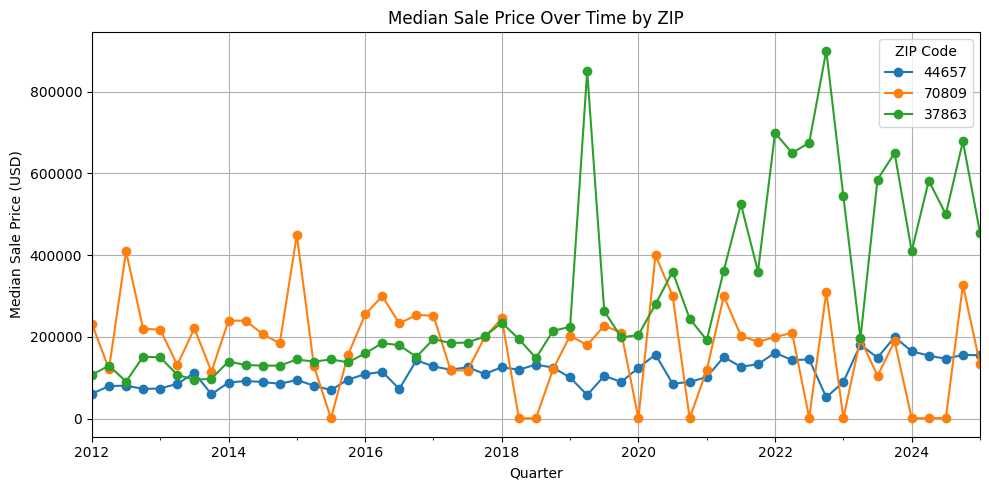

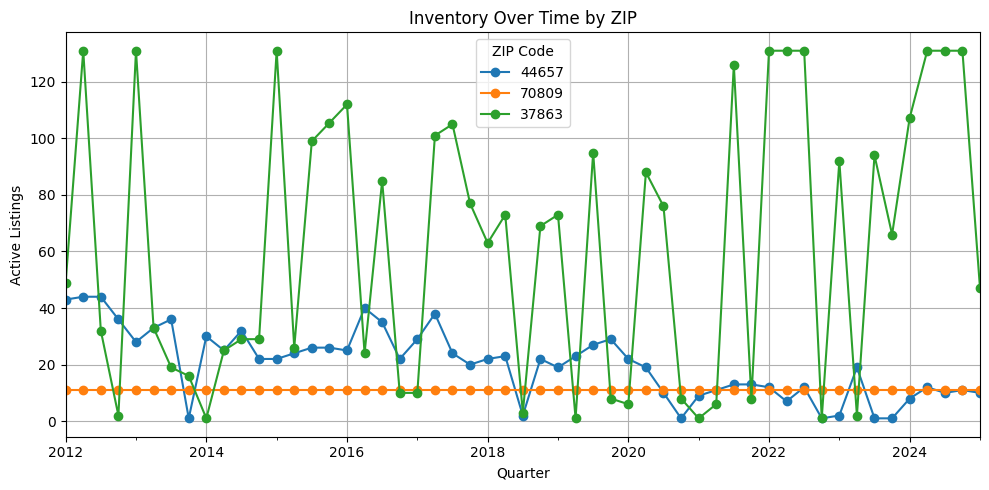

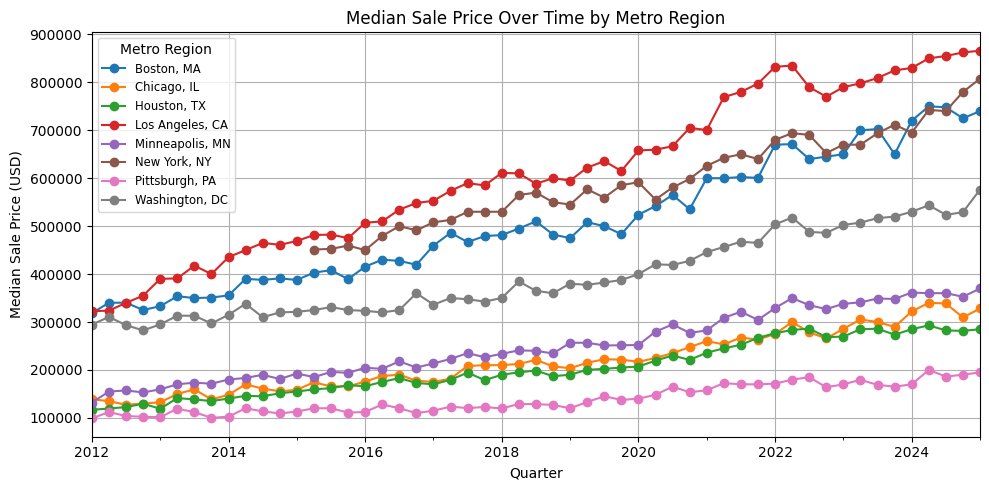

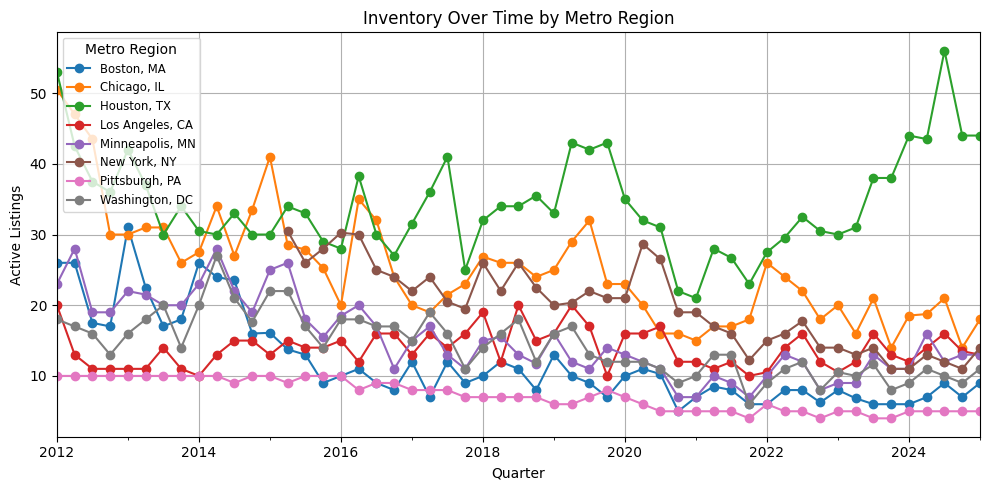

In [6]:
# 1. Ensure we have a quarterly PeriodIndex
if not isinstance(df.index, pd.PeriodIndex):
    df['PERIOD_BEGIN'] = pd.to_datetime(df['PERIOD_BEGIN'])
    df['QUARTER_PERIOD'] = df['PERIOD_BEGIN'].dt.to_period('Q')
    df = df.set_index('QUARTER_PERIOD')

# 2. Pick a few ZIPs that actually exist (e.g. the top 3 by data volume)
top_zips = df['ZIP'].value_counts().nlargest(3).index.tolist()

# 3. Plot median sale price over time for each top ZIP
fig, ax = plt.subplots(figsize=(10, 5))
for z in top_zips:
    ts = df.loc[df['ZIP'] == z, 'MEDIAN_SALE_PRICE']
    if not ts.empty:
        ts.sort_index().plot(ax=ax, marker='o', label=z)
ax.set_title('Median Sale Price Over Time by ZIP')
ax.set_xlabel('Quarter')
ax.set_ylabel('Median Sale Price (USD)')
ax.legend(title='ZIP Code')
ax.grid(True)
plt.tight_layout()
plt.show()

# 4. Plot inventory over time for the same ZIPs
fig, ax = plt.subplots(figsize=(10, 5))
for z in top_zips:
    ts = df.loc[df['ZIP'] == z, 'INVENTORY']
    if not ts.empty:
        ts.sort_index().plot(ax=ax, marker='o', label=z)
ax.set_title('Inventory Over Time by ZIP')
ax.set_xlabel('Quarter')
ax.set_ylabel('Active Listings')
ax.legend(title='ZIP Code')
ax.grid(True)
plt.tight_layout()
plt.show()

# 5. Pick the top 5 metro regions by observation count
top_regions = df['PARENT_METRO_REGION'].value_counts().nlargest(8).index.tolist()

# 6. Plot median sale price over time by metro region
sale_by_region = (
    df[df['PARENT_METRO_REGION'].isin(top_regions)]
    .groupby(['QUARTER_PERIOD','PARENT_METRO_REGION'])['MEDIAN_SALE_PRICE']
    .median()
    .unstack('PARENT_METRO_REGION')
)
sale_by_region.plot(figsize=(10, 5), marker='o')
plt.title('Median Sale Price Over Time by Metro Region')
plt.xlabel('Quarter')
plt.ylabel('Median Sale Price (USD)')
plt.legend(title='Metro Region', loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Plot inventory over time by metro region
inv_by_region = (
    df[df['PARENT_METRO_REGION'].isin(top_regions)]
    .groupby(['QUARTER_PERIOD','PARENT_METRO_REGION'])['INVENTORY']
    .median()
    .unstack('PARENT_METRO_REGION')
)
inv_by_region.plot(figsize=(10, 5), marker='o')
plt.title('Inventory Over Time by Metro Region')
plt.xlabel('Quarter')
plt.ylabel('Active Listings')
plt.legend(title='Metro Region', loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

## Temporal Trends: ZIP-Level Observations

- **44657**  
  - Steady, gradual rise in median sale price from \$70 K in 2012 to around \$160 K by 2025.  
  - Inventory declines from ~40 active listings per quarter down to ~10, indicating tightening supply and likely upward price pressure over time.  
  - This ZIP exhibits smooth, reliable trends—ideal for inclusion in a first-time buyer analysis.

- **70809**  
  - Highly erratic median prices with several quarters at \$0 (no recorded sales) and intermittent spikes up to \$400 K–\$450 K.  
  - Inventory is flat at ~11 listings but the absence of sales in many quarters suggests very low market activity.  
  - Such low-volume ZIPs should be filtered out or treated cautiously, as their medians reflect sample artifacts rather than stable markets.

- **37863**  
  - Large price swings, including jumps above \$800 K, driven by very few transactions per quarter.  
  - Inventory is extremely volatile (from 0 up to 130+ listings), again reflecting inconsistent data coverage.  
  - This pattern underscores the need to restrict analysis to ZIPs with a minimum number of quarterly sales and listings.

---

## Temporal Trends: Metro-Region Insights

- **Price Appreciation**  
  - All major metros show a consistent upward trajectory from 2012 through 2025, with an accelerated ramp beginning around 2020.  
  - **Los Angeles, CA** leads absolute growth (from ~\$320 K to ~\$880 K), followed by **New York, NY** and **Boston, MA**.  
  - Secondary metros (Chicago, Houston, Minneapolis, Pittsburgh, Washington DC) exhibit similar upward slopes but at lower absolute levels, making them potentially more affordable for first-time buyers.

- **Supply Dynamics**  
  - Inventory across nearly every metro has trended downward over the last decade, signaling tightening supply.  
  - **Chicago** and **Boston** have seen listings fall from 20–30 down to single digits per quarter.  
  - **Houston** bucks the trend slightly with a modest rebound in inventory after 2022, offering occasional relief for buyers.

---

### Implications for First-Time Buyers

- Focus on ZIPs (and metros) with **smooth, upward price trends** and **moderate, not vanishing, supply**.  
- **Exclude** low-volume ZIPs where zero-sale quarters or extreme spikes make medians unreliable.  
- In metro selection, weigh absolute price levels against growth momentum—secondary metros may offer better affordability with healthy appreciation.  
- Monitor supply trends: markets with rapidly shrinking inventory may intensify competition, suggesting a trade-off between future appreciation and present buying feasibility.  

In [7]:
'''
Functions to play with the data:

1. Plot time‐series of one or more metrics for given ZIP codes.
    
    Parameters:
    - zip_codes: list of ZIP code strings
    - df: DataFrame indexed by quarterly PeriodIndex with columns including ZIP and metrics
    - metrics: list of column names to plot

'''

def plot_zip_time_series(zip_codes, df, metrics=['MEDIAN_SALE_PRICE', 'INVENTORY']):
    """
    Plot time‐series of one or more metrics for given ZIP codes.
    
    Parameters:
    - zip_codes: list of ZIP code strings
    - df: DataFrame indexed by quarterly PeriodIndex with columns including ZIP and metrics
    - metrics: list of column names to plot
    """
    for metric in metrics:
        fig, ax = plt.subplots(figsize=(10, 5))
        for z in zip_codes:
            ts = df[df['ZIP'] == z][metric].sort_index()
            if ts.empty:
                print(f"⚠️ No data for ZIP {z}")
                continue
            ts.plot(ax=ax, marker='o', label=z)
        ax.set_title(f"{metric} Over Time by ZIP")
        ax.set_xlabel('Quarter')
        ax.set_ylabel(metric.replace('_', ' ').title())
        ax.legend(title='ZIP Code')
        ax.grid(True)
        plt.tight_layout()
        plt.show()

'''
2. Identify the top_n metro‐regions (cities) in a given state by data volume,
    and plot the specified metric over time for each.
    
    Parameters:
    - state_code: two‐letter state abbreviation (e.g. 'TX')
    - top_n: number of cities to select
    - df: DataFrame with a PARENT_METRO_REGION column containing 'City, ST'
    - metric: the column name to plot (defaults to MEDIAN_SALE_PRICE)

'''

def plot_top_cities_in_state(state_code, top_n, df, metric='MEDIAN_SALE_PRICE'):
    """
    Plot one median time series per top metro-region in a state,
    properly aggregating ZIP-level data to a single line per city.
    
    Parameters:
    - state_code: e.g. 'TX'
    - top_n:      number of metros to plot
    - df:         cleaned DataFrame with columns ZIP, PERIOD_BEGIN,
                  PARENT_METRO_REGION, and your metric
    - metric:     column to aggregate and plot
    """
    # 1) Normalize ZIPs to strings like '01234'
    df = df.copy()
    df['ZIP'] = df['ZIP'].astype(str).str.zfill(5)

    # 2) Ensure quarterly PeriodIndex
    if not isinstance(df.index, pd.PeriodIndex):
        df['PERIOD_BEGIN'] = pd.to_datetime(df['PERIOD_BEGIN'])
        df['quarter_period'] = df['PERIOD_BEGIN'].dt.to_period('Q')
        df = df.set_index('quarter_period')
    else:
        # if it's already the index, just alias for clarity
        df.index.name = 'quarter_period'
    
    # 3) Filter to metros in the given state
    mask = df['PARENT_METRO_REGION'].str.endswith(f", {state_code.upper()}", na=False)
    sub = df[mask]
    if sub.empty:
        print(f"⚠️ No data for state: {state_code.upper()}")
        return
    
    # 4) Pick top_n metros by number of ZIP-quarter rows
    top_metros = (
        sub['PARENT_METRO_REGION']
        .value_counts()
        .nlargest(top_n)
        .index
        .tolist()
    )
    print(f"Top {top_n} metros in {state_code.upper()}: {top_metros}\n")

    # 5) Aggregate to median metric per quarter_per metro
    agg = (
        sub
        .groupby([sub.index, 'PARENT_METRO_REGION'])[metric]
        .median()
        .unstack('PARENT_METRO_REGION')
        [top_metros]                          # keep only top metros
        .sort_index()                         # sort by quarter
    )

    # 6) Convert PeriodIndex to actual timestamps for plotting
    agg.index = agg.index.to_timestamp()

    # 7) Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    for metro in top_metros:
        ax.plot(
            agg.index,
            agg[metro],
            marker='o',
            linewidth=2,
            label=metro
        )
    ax.set_title(f"{metric.replace('_',' ').title()} Over Time in Top {top_n} Metros of {state_code.upper()}")
    ax.set_xlabel("Quarter")
    ax.set_ylabel(metric.replace('_',' ').title())
    ax.grid(True)
    ax.legend(title='Metro Region', loc='upper left')
    plt.tight_layout()
    plt.show()

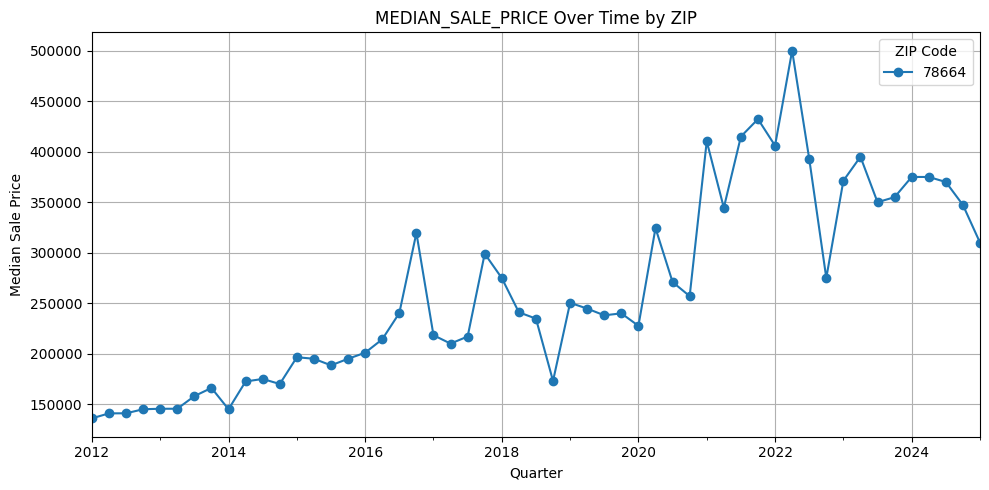

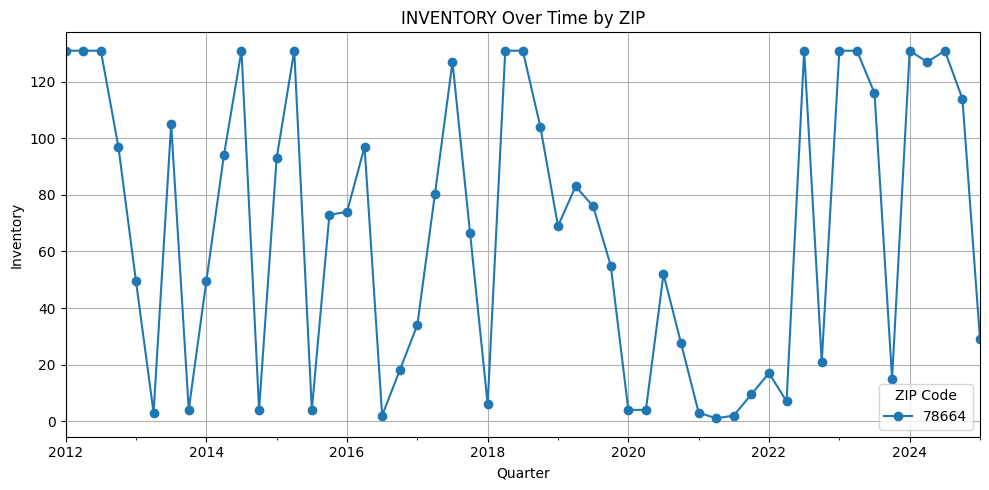

Top 7 metros in TX: ['Houston, TX', 'Dallas, TX', 'San Antonio, TX', 'Fort Worth, TX', 'Austin, TX', 'El Paso, TX', 'Beaumont, TX']



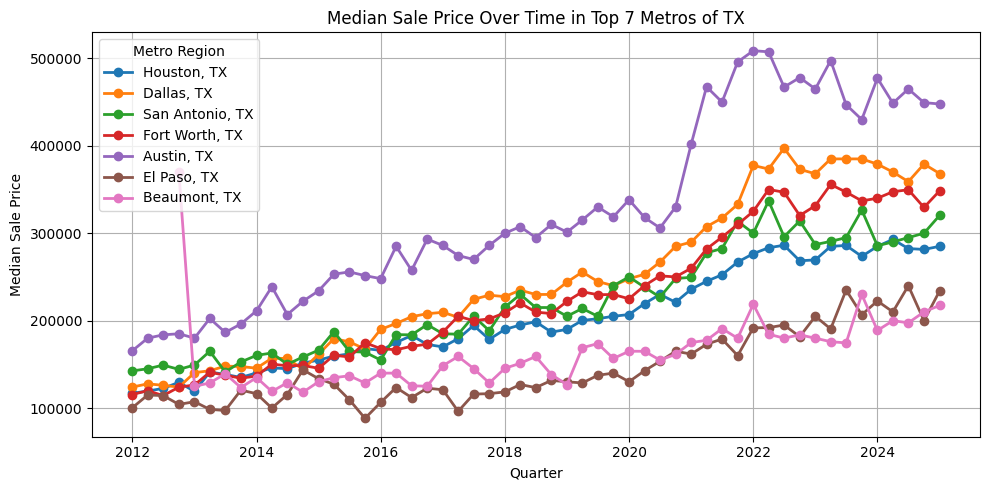

In [8]:
# For specific ZIP codes:
plot_zip_time_series(['78664'], df) # Round Rock,TX

# For the top 5 cities in Texas by data volume:
plot_top_cities_in_state('TX', 7, df, metric='MEDIAN_SALE_PRICE')


# 4. Compare geographies  
**Map metric heatmaps to highlight areas with the most favorable conditions for first-time buyers.**  

In [9]:
!pip install geopandas folium

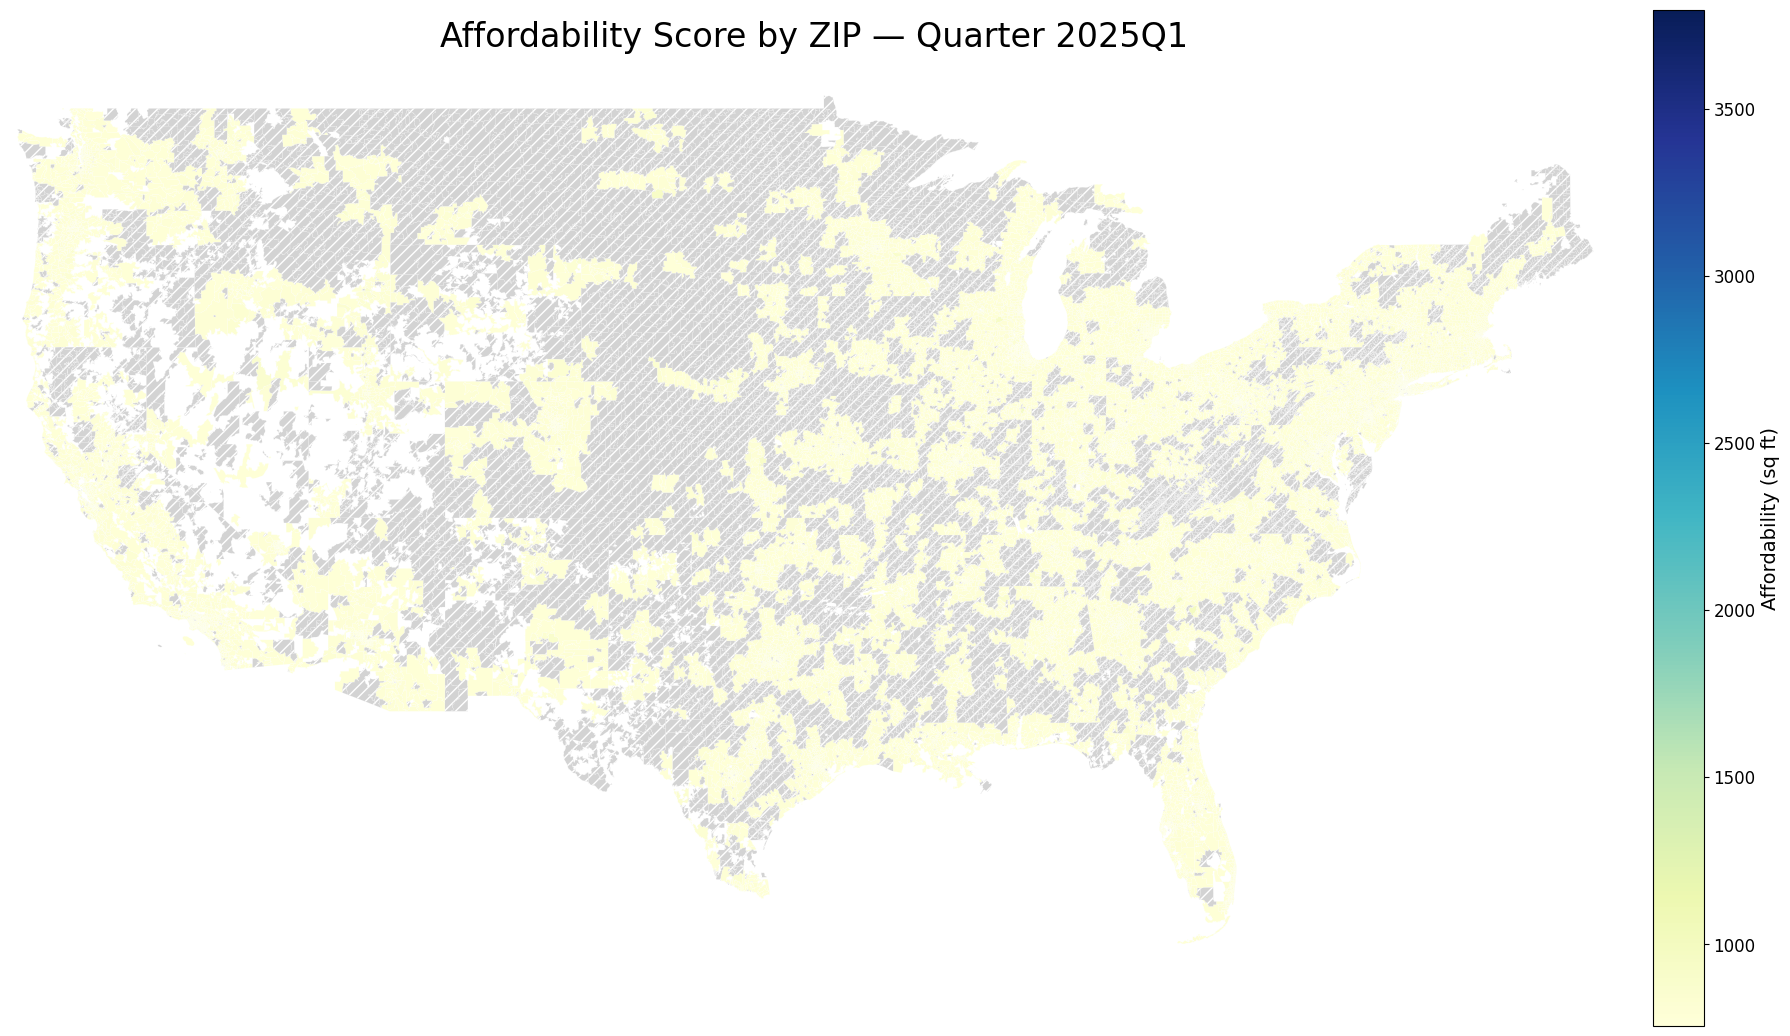

In [10]:
import geopandas as gpd
import matplotlib as mpl
from shapely.geometry import box

# --- Load & prepare data (as before) ---
shp_path = 'data/zip_shapes/tl_2024_us_zcta520.shp'
zip_shapes = gpd.read_file(shp_path)

# Make sure the CRS is set to WGS84 (lat/lon)
zip_shapes = zip_shapes.to_crs(epsg=4326)

zip_shapes['ZIP'] = zip_shapes['ZCTA5CE20'].astype(str).str.zfill(5)

latest_q   = df.index.max()
df_latest  = df.loc[latest_q].reset_index()
df_latest['ZIP'] = df_latest['ZIP'].astype(str).str.zfill(5)
df_latest['affordability_score'] = (
    df_latest['MEDIAN_SALE_PRICE'] / df_latest['MEDIAN_PPSF']
)

map_df = zip_shapes.merge(
    df_latest[['ZIP','affordability_score']],
    on='ZIP', how='left'
)

# --- Filter to contiguous US by bounding‐box intersection ---
contig_bbox = box(-125, 24, -66, 50)  # lon_min, lat_min, lon_max, lat_max
map_df = map_df[map_df.geometry.intersects(contig_bbox)]

# --- Static, full‐page map with custom colorbar ---
fig, ax = plt.subplots(figsize=(18, 12))
vmin, vmax = map_df['affordability_score'].quantile([0.01, 0.99])

map_df.plot(
    column='affordability_score',
    cmap='YlGnBu',
    linewidth=0.1,
    edgecolor='white',
    ax=ax,
    legend=False,
    missing_kwds={'color': 'lightgrey', 'hatch': '///'}
)
ax.set_title(f"Affordability Score by ZIP — Quarter {latest_q}", fontsize=24, pad=20)
ax.set_axis_off()
ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)

sm = mpl.cm.ScalarMappable(
    cmap='YlGnBu',
    norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax)
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Affordability (sq ft)', fontsize=14)

plt.tight_layout()
plt.show()


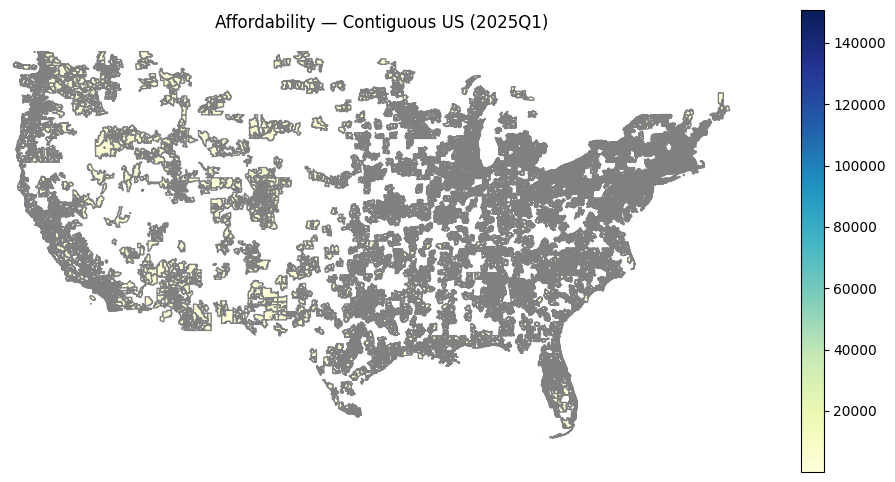

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
map_df.plot('affordability_score', cmap='YlGnBu', ax=ax, edgecolor='grey', legend=True)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)
ax.set_title('Affordability — Contiguous US (2025Q1)')
ax.axis('off')
plt.show()

In [12]:
'''Look for affordability score in any state using state's ZIP prefix. For example texas prefix is 75.'''

def plot_state_affordability(
    map_df,
    zip_prefixes,
    state_name=None,
    quarter_label=None,
    figsize=(8, 6),
    cmap='YlGnBu'
):
    """
    Plot ZIP-level affordability for a given state (by ZIP prefix).

    Parameters
    ----------
    map_df : GeoDataFrame
        Must contain columns 'ZIP', 'affordability_score', and a geometry.
    zip_prefixes : str or list of str
        One or more leading ZIP prefixes for the state (e.g. '75' or ['75','88'] for TX).
    state_name : str, optional
        Friendly name to use in the title (e.g. 'Texas'). Defaults to using zip_prefixes.
    quarter_label : str, optional
        Quarter string to include in the title (e.g. '2025Q1'). If None, the title omits it.
    figsize : tuple, default (8,6)
        Figure size for the plot.
    cmap : str, default 'YlGnBu'
        Matplotlib colormap to use.
    """
    if isinstance(zip_prefixes, str):
        prefixes = [zip_prefixes]
    else:
        prefixes = list(zip_prefixes)

    # Subset the GeoDataFrame
    mask = map_df['ZIP'].str.startswith(tuple(prefixes))
    subset = map_df[mask]

    if subset.empty:
        print(f"No ZIPs found for prefixes {prefixes}. Check your input.")
        return

    # Build title
    title_state = state_name or "/".join(prefixes)
    title_quarter = f" — {quarter_label}" if quarter_label else ""
    title = f"Affordability in {title_state}{title_quarter}"

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    subset.plot(
        column='affordability_score',
        cmap=cmap,
        ax=ax,
        edgecolor='grey',
        legend=True,
        legend_kwds={'label': 'Affordability (sq ft)'}
    )
    ax.set_title(title, fontsize=16, pad=12)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

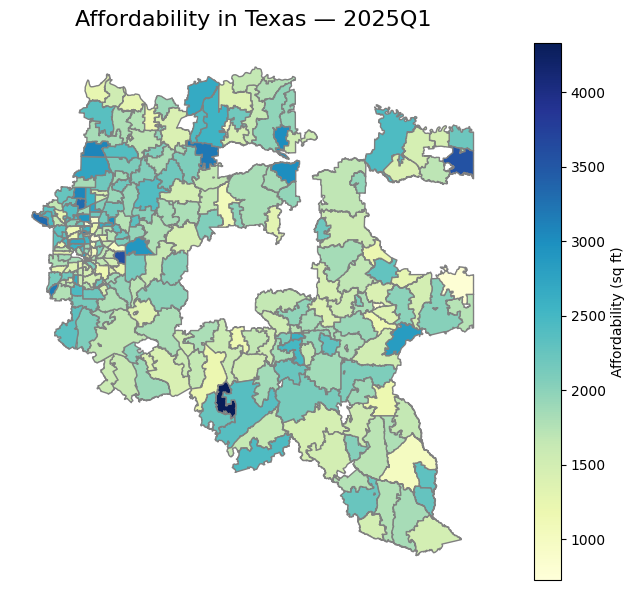

In [13]:
# Example usage: Texas
latest_q = df.index.max().strftime("%YQ%q")  # e.g. "2025Q1"
plot_state_affordability(
    map_df,
    zip_prefixes='75',
    state_name='Texas',
    quarter_label=latest_q,
    figsize=(8, 6)
)

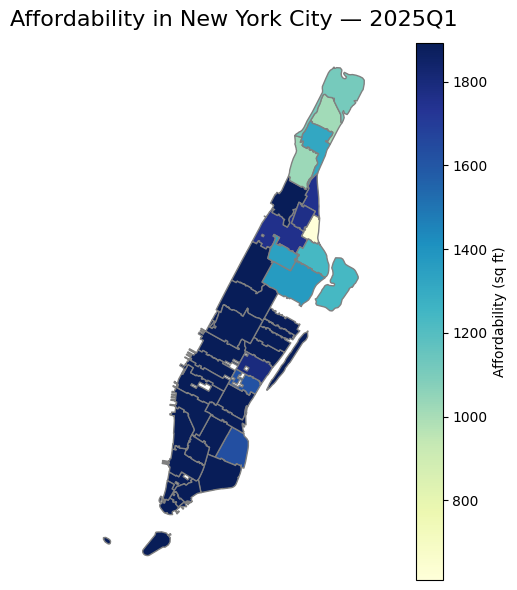

In [14]:
# Example usage: New York City
latest_q = df.index.max().strftime("%YQ%q")  # e.g. "2025Q1"
plot_state_affordability(
    map_df,
    zip_prefixes='100',
    state_name='New York City',
    quarter_label=latest_q,
    figsize=(8, 6)
)

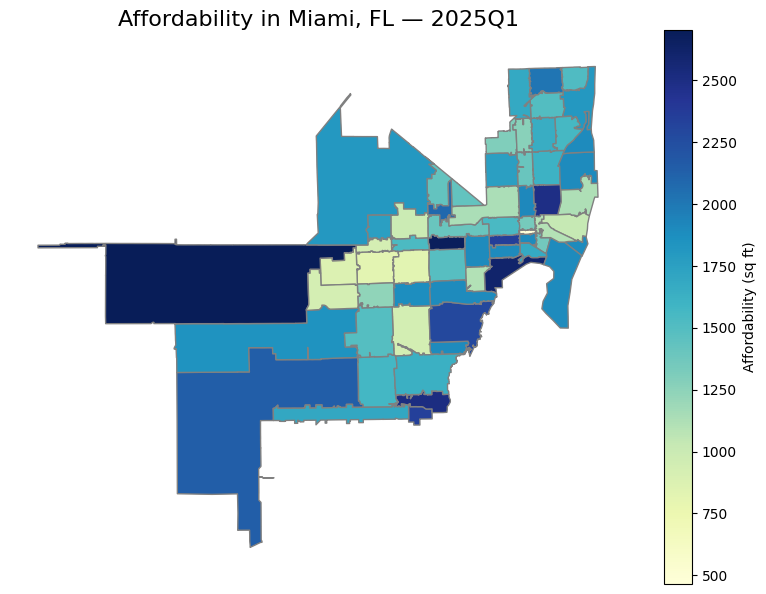

In [15]:
# Example usage: Miami, FL
latest_q = df.index.max().strftime("%YQ%q")  # e.g. "2025Q1"
plot_state_affordability(
    map_df,
    zip_prefixes='331',
    state_name='Miami, FL',
    quarter_label=latest_q,
    figsize=(8, 6)
)

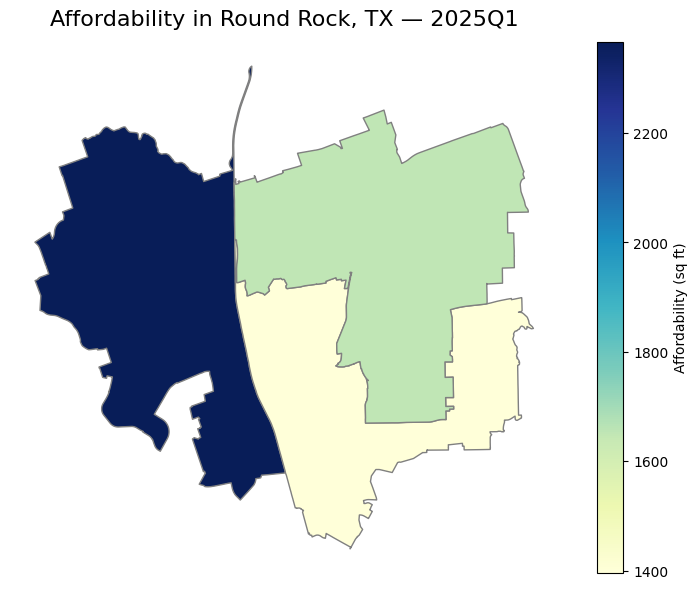

In [16]:
# Example usage: Round Rock, TX (all ZIPs listed)
latest_q = df.index.max().strftime("%YQ%q")  # e.g. "2025Q1"
plot_state_affordability(
    map_df,
    zip_prefixes=['78664','78665','78680','78681','78682','78683'],
    state_name='Round Rock, TX',
    quarter_label=latest_q,
    figsize=(8, 6)
)

# 5. Check Price growth
**Check The Median price growth by zipcode over 5 years and 10 years horizon.**


### Top ZIPs by 5-Year Growth (Single Family Residential)


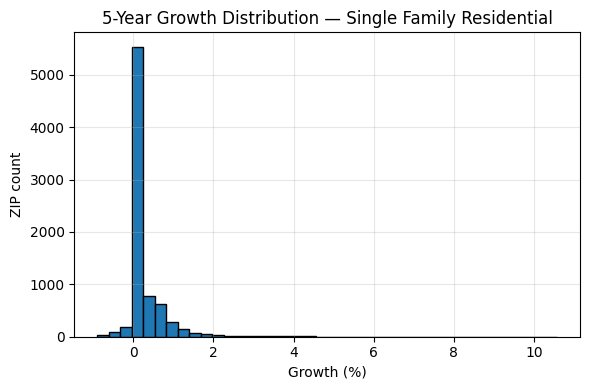


### Top ZIPs by 10-Year Growth (Single Family Residential)


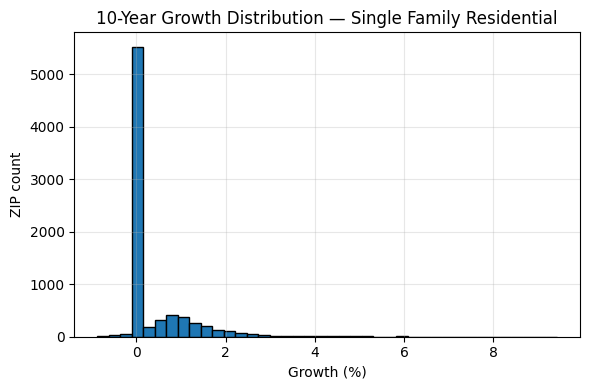

In [48]:
"""
Check The Median price growth by zipcode over 5 years and 10 years horizon for Single Family Homes.
"""

# ---------------- parameters ----------------
PROP      = 'Single Family Residential'          # or 'All residential'
MIN_BASE  = 50_000
horizons  = {5: 20, 10: 40}            # yrs ➜ quarters
latest_q  = df.index.max()             # e.g. 2025Q2

# ------------- helper: one price per ZIP per quarter ---------------
def snapshot(q, prop=PROP):
    return (df.loc[q]
              .query("PROPERTY_TYPE == @prop")
              .groupby('ZIP', as_index=False)['MEDIAN_SALE_PRICE']
              .median()
              .rename(columns={'MEDIAN_SALE_PRICE': 'price'}))

now_df = snapshot(latest_q).rename(columns={'price': 'price_now'})

# ---------- compute growth for each horizon & build summary ----------
summary = now_df.copy()
for yrs, q_shift in horizons.items():
    base_q = latest_q - q_shift
    if base_q not in df.index:
        print(f"⏭ Skipping {yrs}-year: base quarter {base_q} missing.")
        continue

    base_df = snapshot(base_q).rename(columns={'price': f'price_{yrs}y_ago'})
    summary = summary.merge(base_df, on='ZIP', how='left')

    summary[f'pct_growth_{yrs}y'] = np.where(
        summary[f'price_{yrs}y_ago'] >= MIN_BASE,
        summary['price_now'] / summary[f'price_{yrs}y_ago'] - 1,
        0.0
    )

# ---------------- top-N & histogram display ----------------
def top_table(s, yrs, n=15):
    col = f'pct_growth_{yrs}y'
    return (s[['ZIP', f'price_{yrs}y_ago', 'price_now', col]]
            .nlargest(n, col)
            .style.format({
                f'price_{yrs}y_ago': '${:,.0f}',
                'price_now'        : '${:,.0f}',
                col                : '{:.1%}'
            }))

for yrs in horizons:
    col = f'pct_growth_{yrs}y'
    if col not in summary.columns:   # horizon skipped earlier
        continue

    print(f"\n### Top ZIPs by {yrs}-Year Growth ({PROP})")
    display(top_table(summary, yrs))

    plt.figure(figsize=(6,4))
    plt.hist(summary[col], bins=40, edgecolor='black')
    plt.title(f'{yrs}-Year Growth Distribution — {PROP}')
    plt.xlabel('Growth (%)'); plt.ylabel('ZIP count')
    plt.grid(alpha=.3); plt.tight_layout(); plt.show()


In [43]:
x = (
    df.loc[['2025Q1', '2020Q1']]                      # keep the two quarters
      .query("ZIP == '62674' and PROPERTY_TYPE == 'Single Family Residential'")
      [['ZIP', 'MEDIAN_SALE_PRICE']]
)

x

ZIP  MEDIAN_SALE_PRICE
QUARTER_PERIOD                          
2025Q1          62674           717500.0
2020Q1          62674            62000.0

### Quick Take‑aways & Caveats — Single‑Family Price Growth  
*(latest‑quarter snapshot)*  

| Horizon | Typical ZIPs | Outliers |
|---------|--------------|----------|
| **5‑Year** | ‑5 % to **+40 %** total growth (≈ 0‑7 % CAGR) | Handful jump **200 %‑600 %** because 5‑y‑ago medians were \$50‑100 k. |
| **10‑Year** | 0 % to **+90 %** (≈ 0‑7 % CAGR) | A few rural ZIPs show **6‑10×** gains; driven by tiny base prices + sparse sales. |

**Why such huge numbers?**
* *Small denominators* — \$60 k ➜ \$400 k ⇒ 565 % growth.  
* *Winsor cap* — recent medians hitting the \$962 k ceiling flatten the upper tail.  
* *Low volume* — single luxury sale can shift the quarterly median in thin markets.

**Practical filters before trusting the league tables**
1. Require a minimum # of sales/quarter (e.g., ≥ 10) to avoid single‑sale noise.  
2. Exclude rows where `MEDIAN_SALE_PRICE == 962 000` (cap) or recompute with the 95 th‑pctile cap.  
3. Pair growth with volatility & turnover: seek ZIPs with solid appreciation **and** reasonable liquidity.

> **Bottom line:** most single‑family ZIPs logged healthy but manageable gains; the “1 000 %” winners are statistical mirages unless you verify sales volume and cap effects.


## EDA Highlights — ZIP‑Level U.S. Housing Data (2013 Q3 → 2025 Q2)

### 1. Single‑Variable Patterns  
* **Prices:** Heavy right skew; most ZIP–quarters sit \$50 k–\$250 k, but a long tail reaches the \$1 M winsor cap. ⇒ Log‑transform before modeling.  
* **Price / Sq Ft:** Centres near \$150 psf; gives a size‑normalised affordability view.  
* **Days on Market:** Bulk 30–60 days; small tail > 200 days indicates thin, slow markets.  
* **Inventory:** Median ZIP lists < 20 homes; rare metros exceed 100 listings.  
* **Sale‑to‑List:** Peaks just below 1.00; tail above 1.05 marks hot seller markets.

### 2. Key Relationships  
* **Price vs. List Price:** ρ ≈ 0.90 — listings reliably predict sale medians.  
* **Price vs. PPSF:** ρ ≈ 0.80 — expensive areas also pricey per‑foot.  
* **DOM vs. Price/PPSF:** mild +0.30 — costlier ZIPs linger slightly longer.  
* **Inventory vs. Sale‑to‑List:** weak negative — scarce supply pushes buyers above list.  
* **Two behavioural clusters:**  
  * Balanced (Sale/List ≈ 0.98, inventory < 50)  
  * Seller‑premium (Sale/List ≈ 1.03, inventory often < 10)

### 3. Time‑Series Signals  
* **Smooth growers:** e.g. ZIP 44657 — steady rise \$90 k → \$160 k, inventory sliding 40 → 10 homes. Ideal for first‑time buyers.  
* **Low‑volume noise:** ZIP 70809 — erratic \$400 k spikes with many zero‑sale quarters. Filter these out.  
* **Boom–bust:** ZIP 37863 — swings to \$800 k on tiny volumes; treat with caution.

### 4. Metro Trends (2013‑2025)  
* **All majors rising, turbo‑charged post‑2020.** LA tops \$880 k; NY & Boston follow.  
* **Secondary metros** (Chicago, Houston, Minneapolis) show similar slopes at lower entry prices.  
* **Listing drought:** inventories fell nearly everywhere; only Houston shows a post‑2022 uptick.

### Buyer‑Facing Insights  
* Prefer ZIPs with **steady upward curves** and **mid‑range inventories**.  
* Avoid very thin markets (high DOM, few listings) or wildly volatile medians.  
* Secondary metros may balance affordability and appreciation better than marquee cities.

---

## Next Steps (Feature‑Engineering Notebook)

1. **Robust Outlier Treatment**  
   * Keep current ± 3 × IQR winsorisation globally.  
   * Re‑run at ± 1.5 × IQR within each metro for price variables; compare impact.

2. **Feature Creation**  
   * Log‑prices, YoY/MoM pct changes, rolling 4‑Q averages.  
   * Affordability score, turnover ratio, price‑volatility (std of QoQ pct‑change).  
   * 5‑ & 10‑year growth features already computed.

3. **Market Segmentation**  
   * Fit K‑means on affordability, turnover, DOM, inventory, sale‑to‑list.  
   * Evaluate k ∈ [2, 8] via silhouette, visualise PCA clusters.  
   * One‑hot‑encode cluster label for modeling.

4. **Target Variable for Ranking Model**  
   * **Option A:** “First‑time‑buyer score” = weighted combo of low price, high affordability, moderate turnover, mid‑inventory.  
   * **Option B:** Future 3‑year price appreciation — regress 2025 Q2 → 2028 Q2 growth (when data extends).  
   * Store as `target_score` column.

5. **Data Splits & Leakage Checks**  
   * Train / validate on 2013‑2021, test on 2022‑2025 quarters.  
   * Ensure no future info leaks into training features.

6. **Modeling Pipeline**  
   * Baseline: Gradient‑Boosted Trees with SHAP for interpretability.  
   * Compare against linear and k‑NN recommender using engineered distance metrics.

Deliverables: cleaned feature matrix, cluster assignments, and defined target ready for the modeling notebook.
